In [5]:
%pip install pandas numpy scikit-learn xgboost kaggle seaborn matplotlib opendatasets

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [8]:
import opendatasets as od
import pandas as pd

# Download dataset directly without manual download
od.download("https://www.kaggle.com/datasets/yasserh/housing-prices-dataset")

# Load data
data = pd.read_csv("housing-prices-dataset/Housing.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: lammalikbaat
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset


In [15]:
# Initial data inspection
print("Dataset Shape:", data.shape)
print("\nFirst 5 Rows:")
print(data.head())
print("\nData Types:")
print(data.dtypes)
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Shape: (545, 13)

First 5 Rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Data Types:
price                int64
area               

In [16]:
# Handle missing values (if any)
data.fillna(method='ffill', inplace=True)

# Feature Engineering
data['price_per_area'] = data['price'] / data['area']
data['bath_bed_ratio'] = data['bathrooms'] / data['bedrooms']
data['has_basement'] = data['basement'].apply(lambda x: 1 if x == 'yes' else 0)

# Convert categorical variables
data = pd.get_dummies(data, columns=['mainroad', 'guestroom', 'basement',
                                   'hotwaterheating', 'airconditioning',
                                   'prefarea', 'furnishingstatus'], drop_first=True)

# Separate features and target
X = data.drop('price', axis=1)
y = data['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-16-4c3e0cc8bec2>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [19]:
# Identify numerical and categorical columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

# Numerical preprocessing
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Categorical preprocessing
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Full preprocessing
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [18]:
# Pipeline
lr_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train and evaluate
lr_pipe.fit(X_train, y_train)
y_pred_lr = lr_pipe.predict(X_test)

print("\nLinear Regression Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):,.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):,.2f}")
print(f"R²: {r2_score(y_test, y_pred_lr):.4f}")


Linear Regression Performance:
MAE: 560,558.10
MSE: 663,936,179,480.92
R²: 0.8686


In [20]:
# Pipeline
poly_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Train and evaluate
poly_pipe.fit(X_train, y_train)
y_pred_poly = poly_pipe.predict(X_test)

print("\nPolynomial Regression (Degree=2) Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_poly):,.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_poly):,.2f}")
print(f"R²: {r2_score(y_test, y_pred_poly):.4f}")


Polynomial Regression (Degree=2) Performance:
MAE: 0.00
MSE: 0.00
R²: 1.0000


In [21]:
# Pipeline
tree_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Train and evaluate
tree_pipe.fit(X_train, y_train)
y_pred_tree = tree_pipe.predict(X_test)

print("\nDecision Tree Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_tree):,.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_tree):,.2f}")
print(f"R²: {r2_score(y_test, y_pred_tree):.4f}")


Decision Tree Performance:
MAE: 424,270.64
MSE: 524,474,534,403.67
R²: 0.8962


In [22]:
# Pipeline
forest_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train and evaluate
forest_pipe.fit(X_train, y_train)
y_pred_forest = forest_pipe.predict(X_test)

print("\nRandom Forest Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_forest):,.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_forest):,.2f}")
print(f"R²: {r2_score(y_test, y_pred_forest):.4f}")


Random Forest Performance:
MAE: 281,014.45
MSE: 319,868,813,445.23
R²: 0.9367



Model Comparison:
                   Model           MAE           MSE        R²
0      Linear Regression  5.605581e+05  6.639362e+11  0.868646
1  Polynomial Regression  2.776879e-09  1.638836e-17  1.000000
2          Decision Tree  4.242706e+05  5.244745e+11  0.896238
3          Random Forest  2.810145e+05  3.198688e+11  0.936717


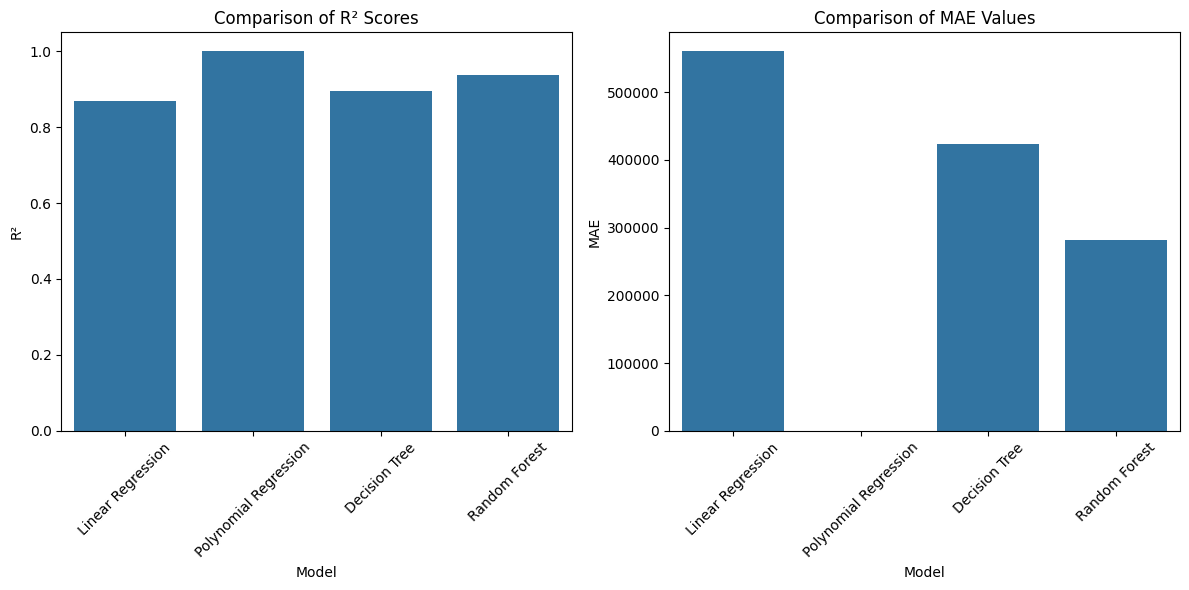

In [23]:
# Create comparison DataFrame
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression', 'Decision Tree', 'Random Forest'],
    'MAE': [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_poly),
        mean_absolute_error(y_test, y_pred_tree),
        mean_absolute_error(y_test, y_pred_forest)
    ],
    'MSE': [
        mean_squared_error(y_test, y_pred_lr),
        mean_squared_error(y_test, y_pred_poly),
        mean_squared_error(y_test, y_pred_tree),
        mean_squared_error(y_test, y_pred_forest)
    ],
    'R²': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_poly),
        r2_score(y_test, y_pred_tree),
        r2_score(y_test, y_pred_forest)
    ]
})

print("\nModel Comparison:")
print(results)

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='R²', data=results)
plt.title('Comparison of R² Scores')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='MAE', data=results)
plt.title('Comparison of MAE Values')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(forest_pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

Best Parameters: {'regressor__max_depth': None, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
Best Score: 184935114750.56357


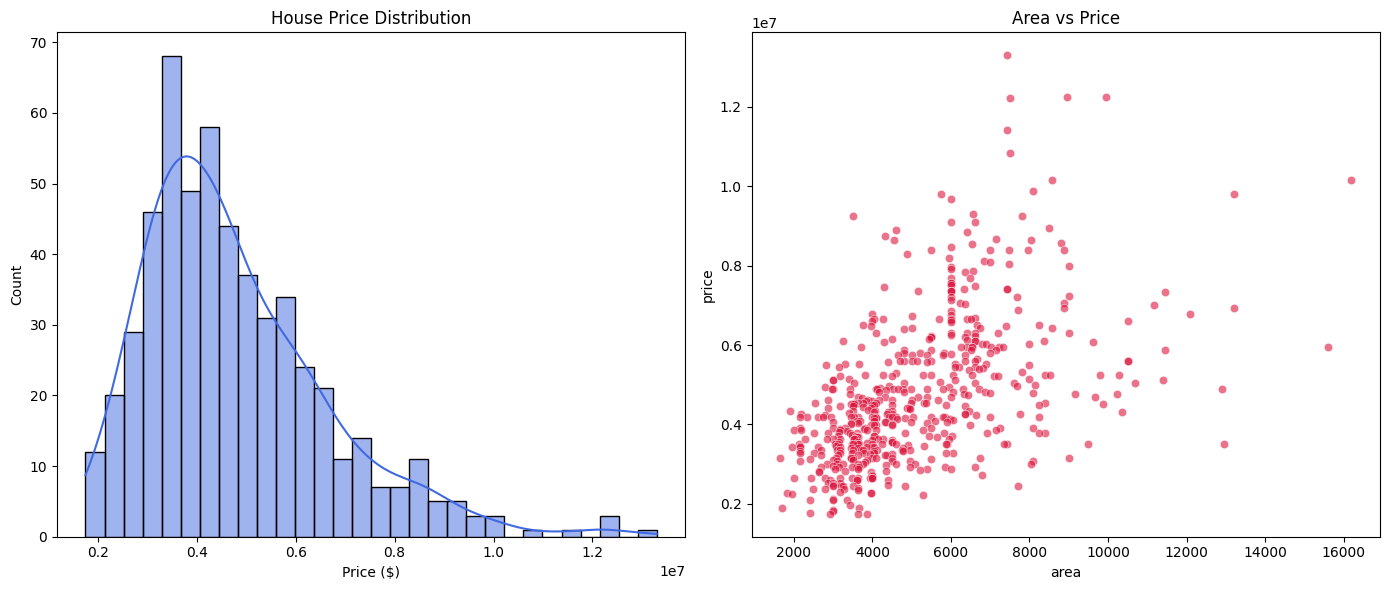

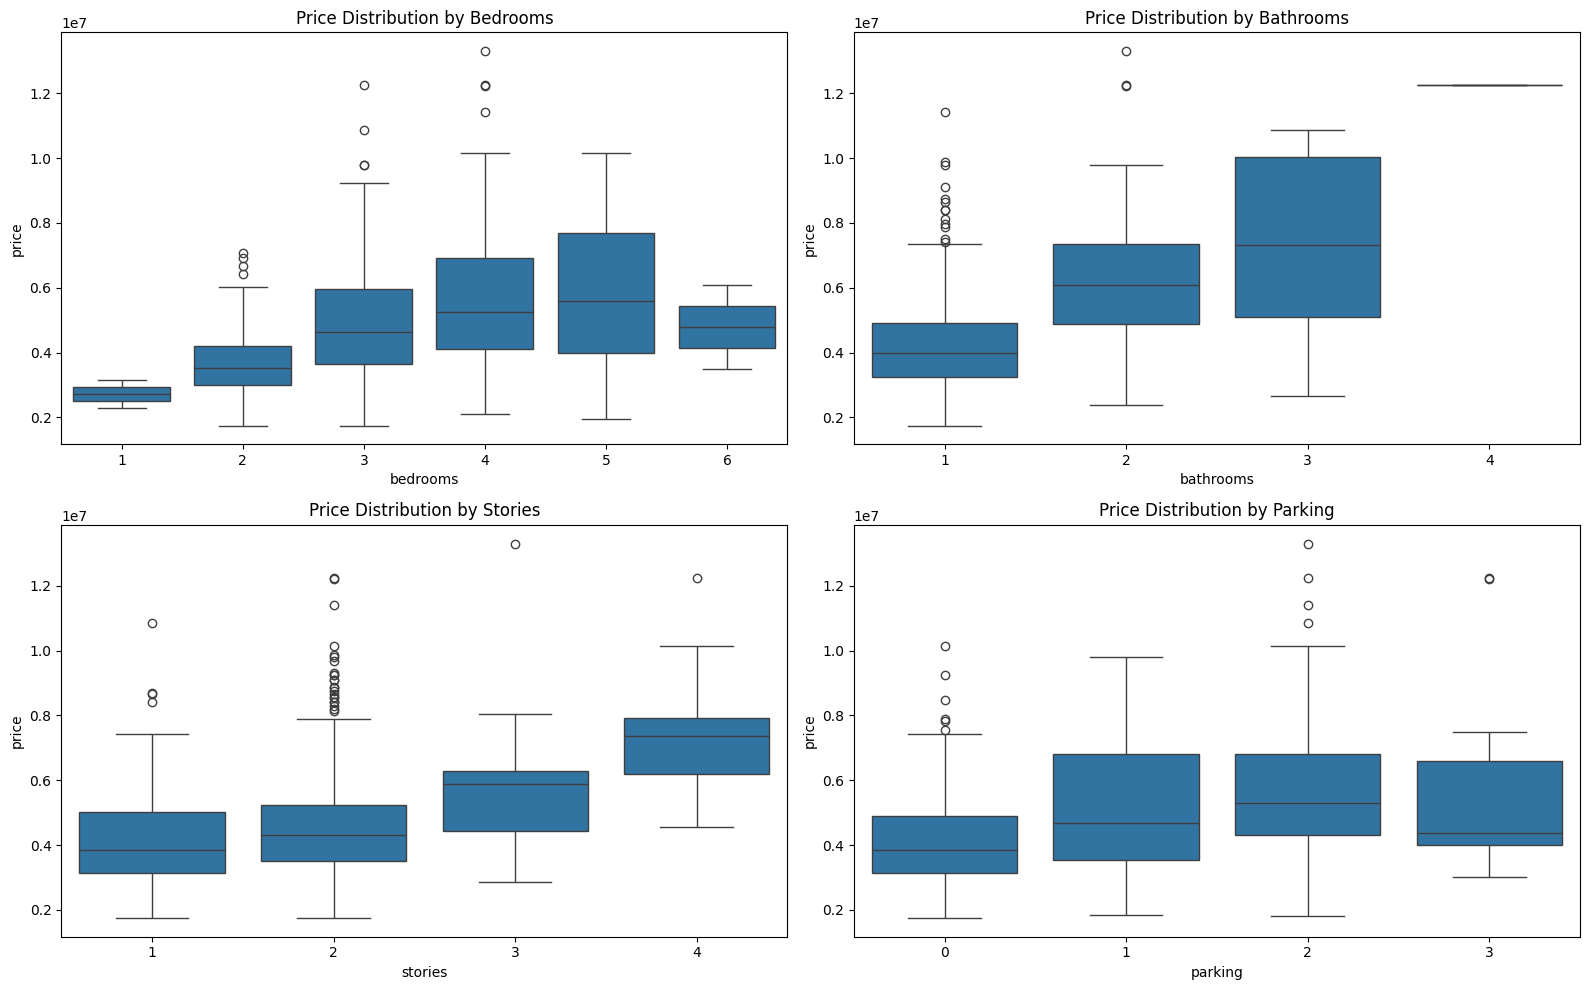

In [29]:
# Set style for all plots
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Price Distribution
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['price'], kde=True, bins=30, color='royalblue')
plt.title('House Price Distribution')
plt.xlabel('Price ($)')

# 2. Area vs Price
plt.subplot(1, 2, 2)
sns.scatterplot(x='area', y='price', data=data, alpha=0.6, color='crimson')
plt.title('Area vs Price')
plt.tight_layout()
plt.show()

# 3. Categorical Feature Analysis
cat_features = ['bedrooms', 'bathrooms', 'stories', 'parking']
plt.figure(figsize=(16, 10))
for i, feature in enumerate(cat_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=feature, y='price', data=data)
    plt.title(f'Price Distribution by {feature.capitalize()}')
plt.tight_layout()
plt.show()

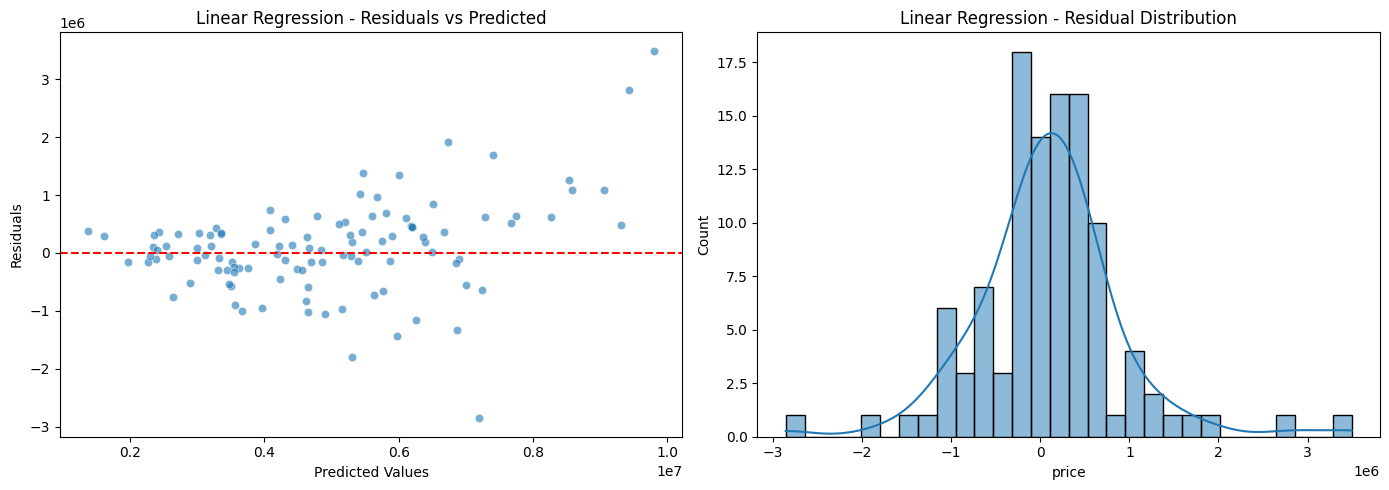

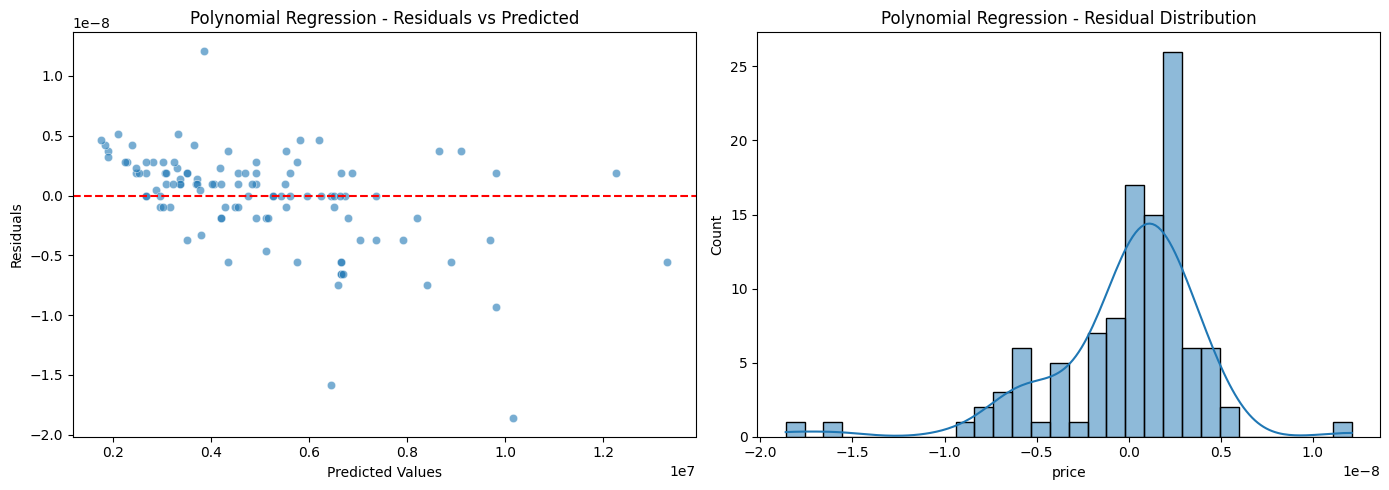

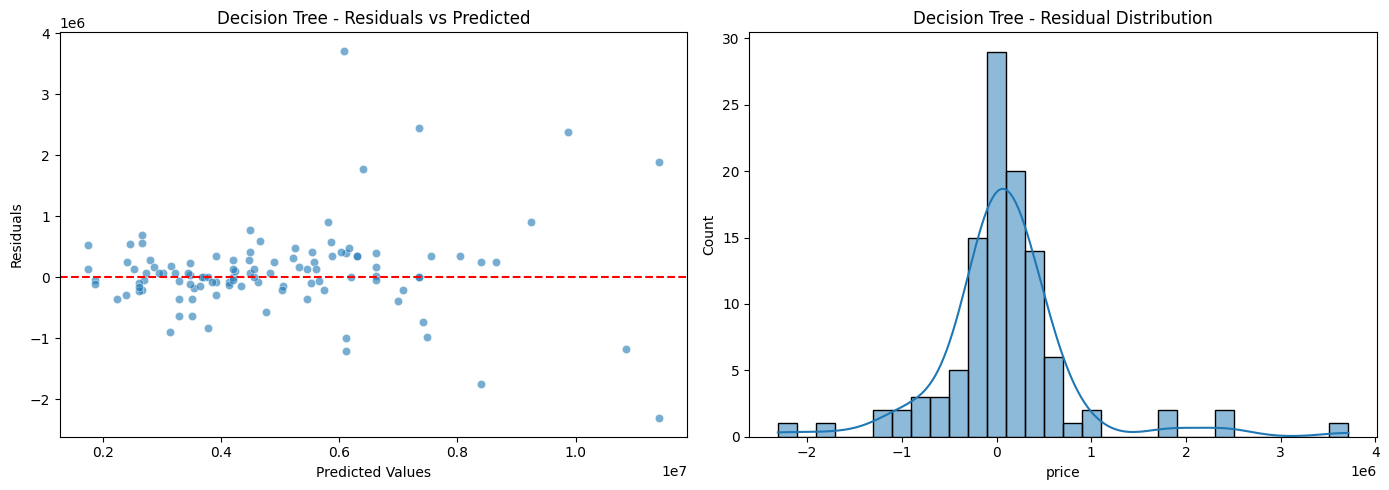

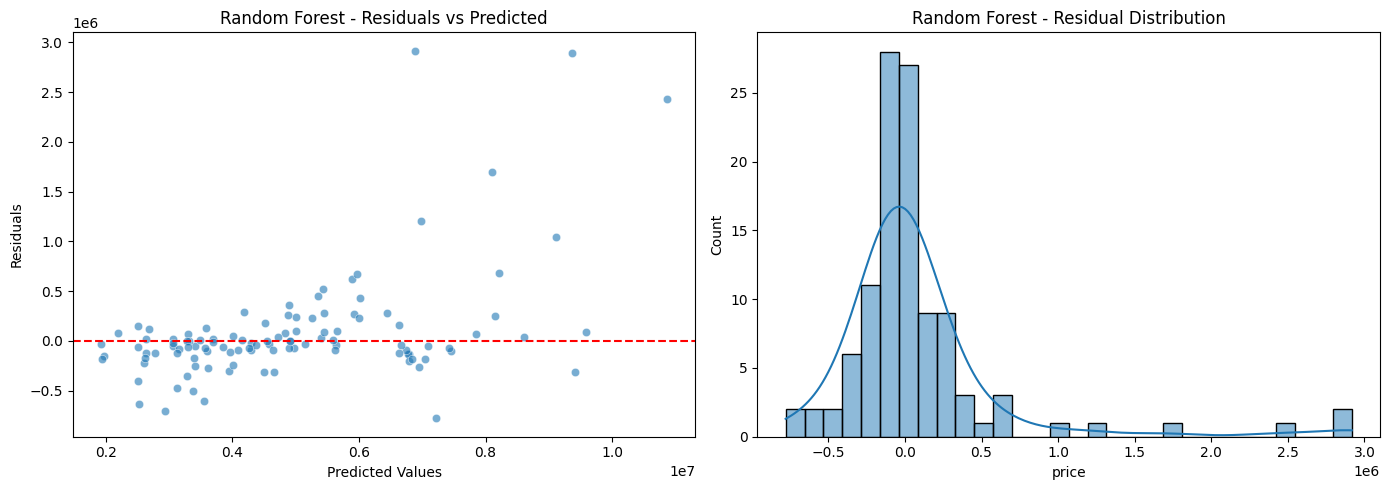

In [26]:
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(14, 5))

    # Residuals vs Predicted
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'{model_name} - Residuals vs Predicted')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

    # Residual Distribution
    plt.subplot(1, 2, 2)
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(f'{model_name} - Residual Distribution')
    plt.tight_layout()
    plt.show()

# Generate for all models
models = {
    'Linear Regression': y_pred_lr,
    'Polynomial Regression': y_pred_poly,
    'Decision Tree': y_pred_tree,
    'Random Forest': y_pred_forest
}

for name, preds in models.items():
    plot_residuals(y_test, preds, name)

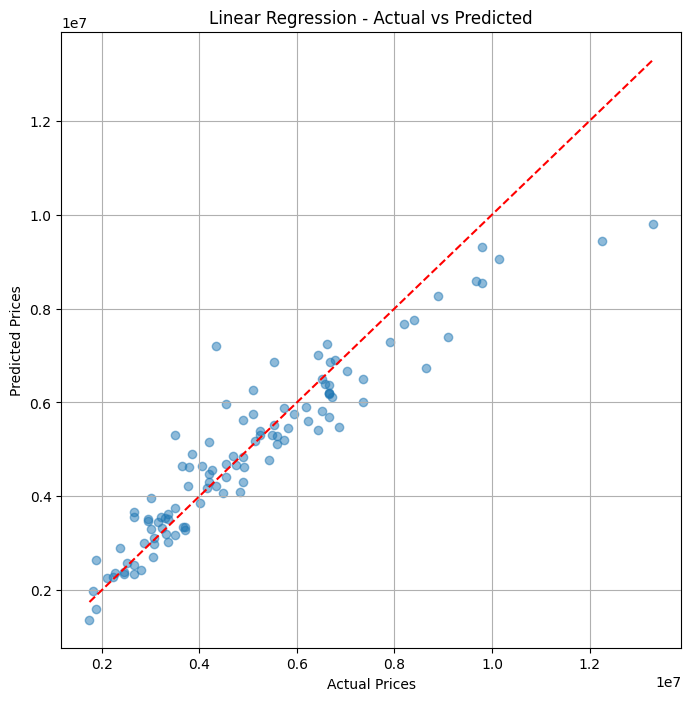

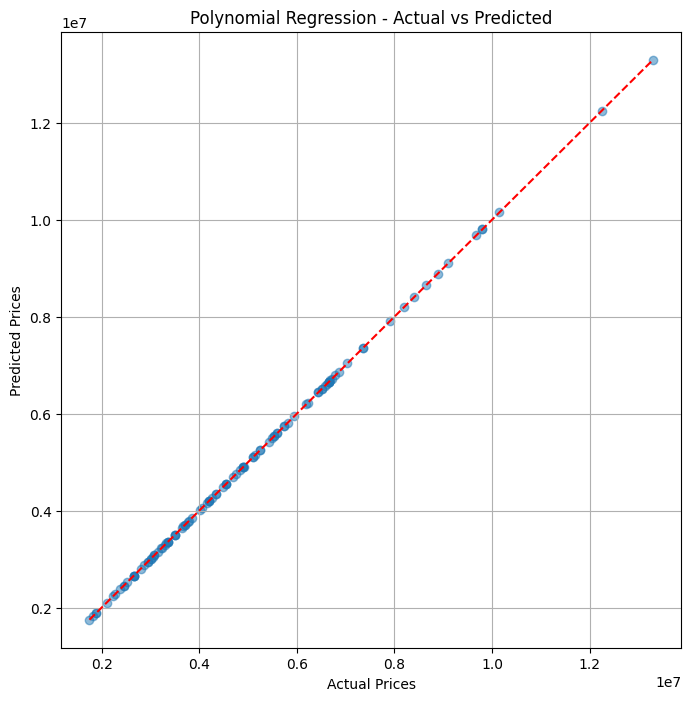

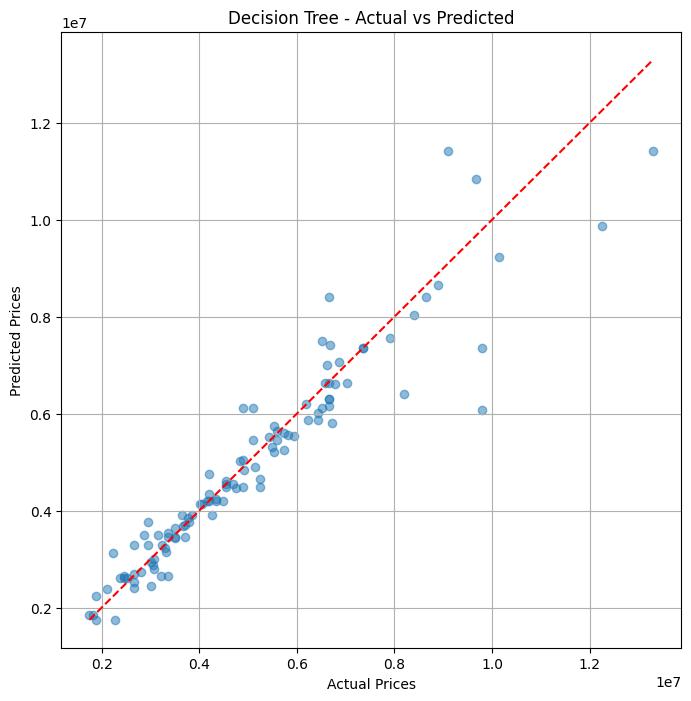

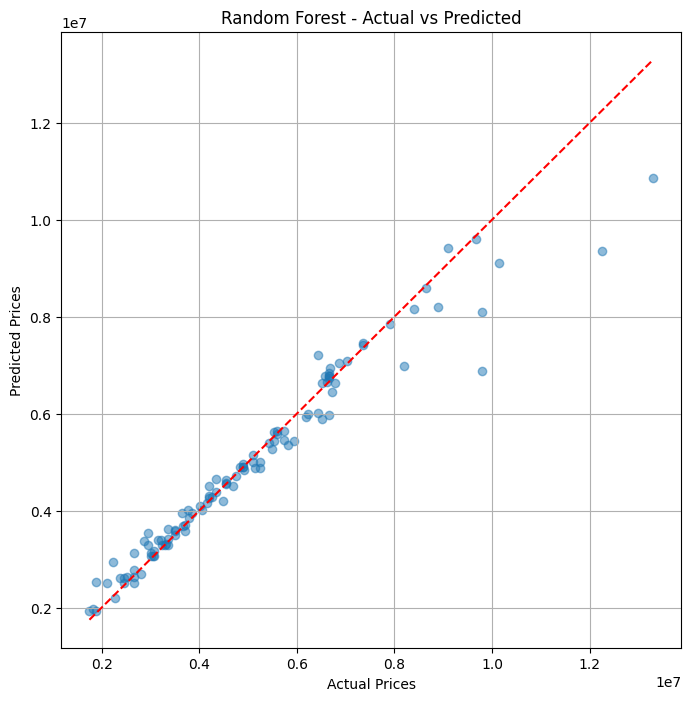

In [30]:
def plot_actual_vs_predicted(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 8))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()],
             [y_true.min(), y_true.max()], 'r--')
    plt.title(f'{model_name} - Actual vs Predicted')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.grid(True)
    plt.show()

for name, preds in models.items():
    plot_actual_vs_predicted(y_test, preds, name)

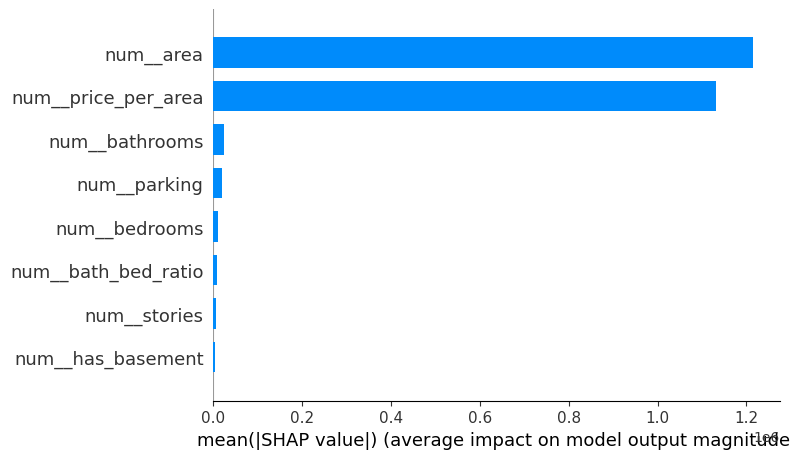

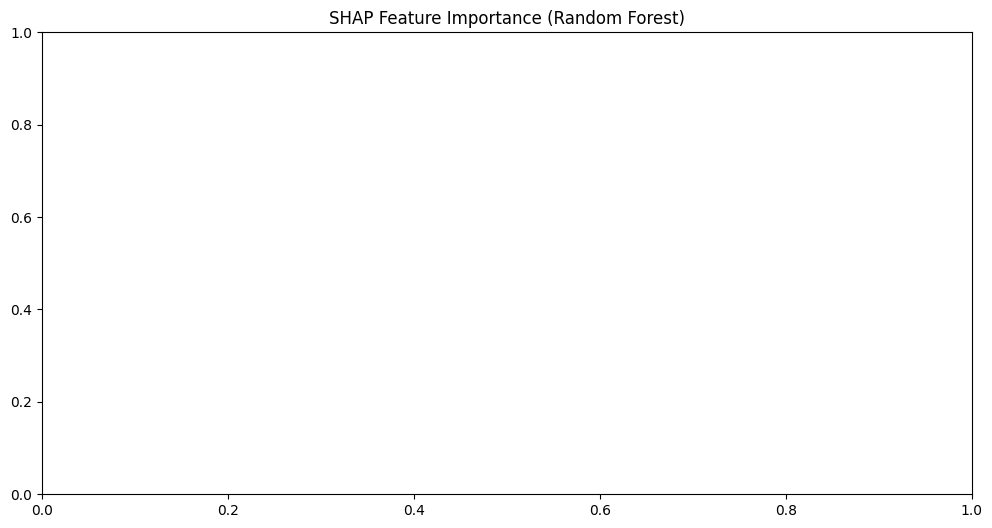

In [33]:
import shap

# Initialize SHAP explainer for Random Forest
explainer = shap.TreeExplainer(forest_pipe.named_steps['regressor'])
# Get the transformed data for the test set
transformed_data = forest_pipe.named_steps['preprocessor'].transform(X_test)
# Get the feature names after transformation
feature_names = forest_pipe.named_steps['preprocessor'].get_feature_names_out(input_features=X_train.columns)
# Compute SHAP values using the transformed data
shap_values = explainer.shap_values(transformed_data)

# Summary plot
shap.summary_plot(shap_values, transformed_data,
                 feature_names=feature_names, plot_type="bar")
plt.title('SHAP Feature Importance (Random Forest)')
plt.show()

# Force plot for single prediction
shap.initjs()
# Using the correct feature names
shap.force_plot(explainer.expected_value, shap_values[0,:],
                transformed_data[0,:],
                feature_names=feature_names)

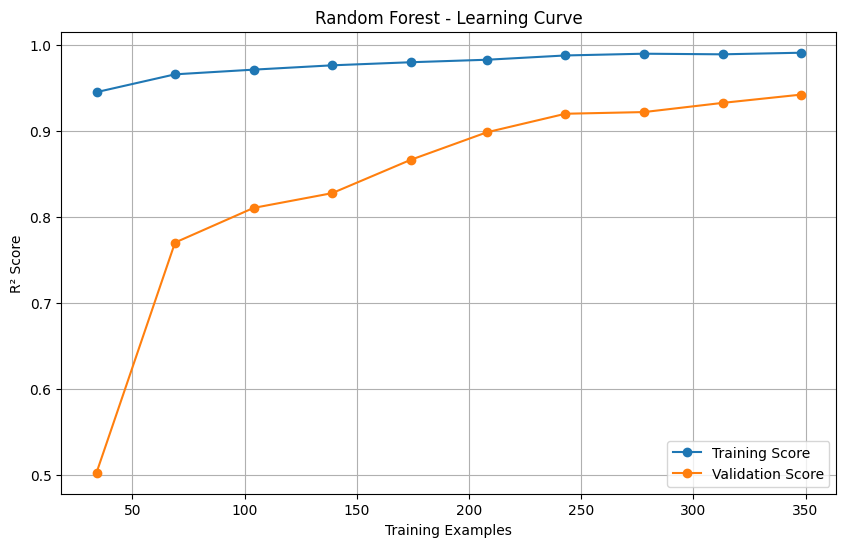

In [32]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='r2',
        train_sizes=np.linspace(0.1, 1.0, 10))

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Validation Score')
    plt.title(f'{model_name} - Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('R² Score')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for Random Forest
plot_learning_curve(forest_pipe, X_train, y_train, 'Random Forest')

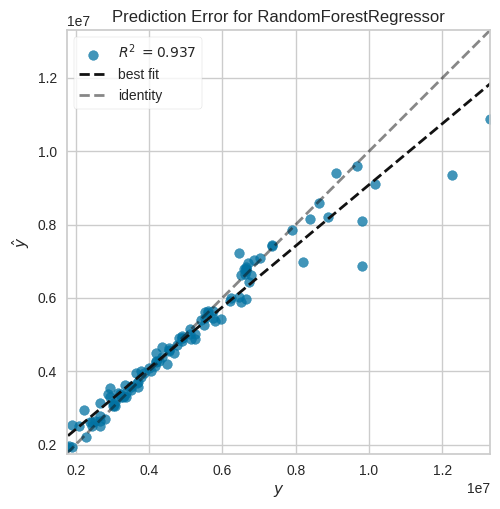

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [34]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(forest_pipe)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

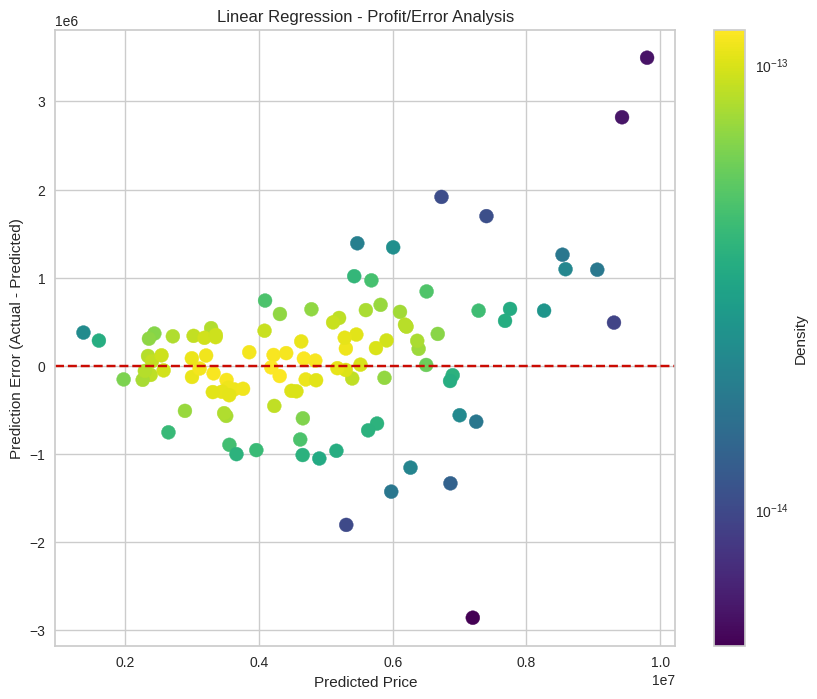

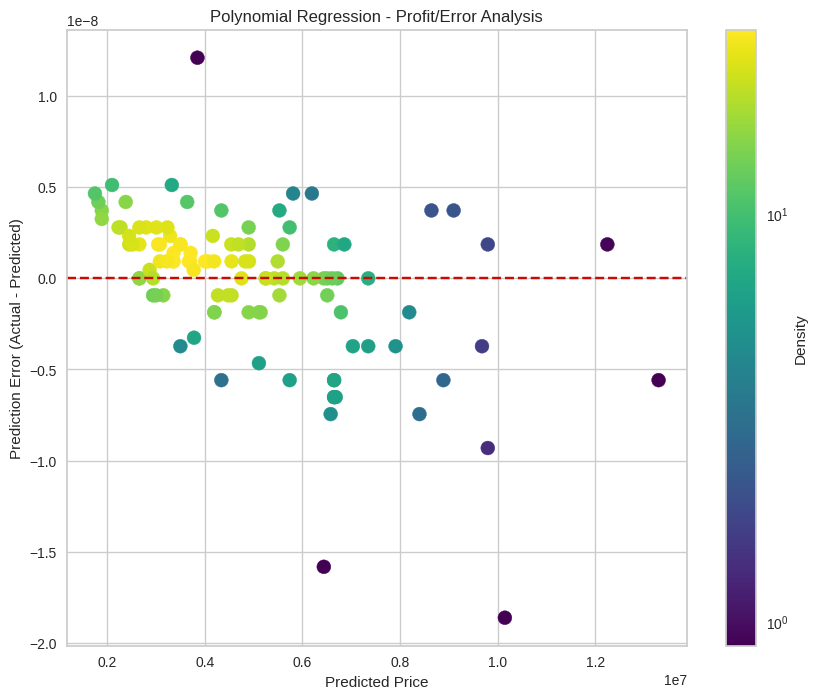

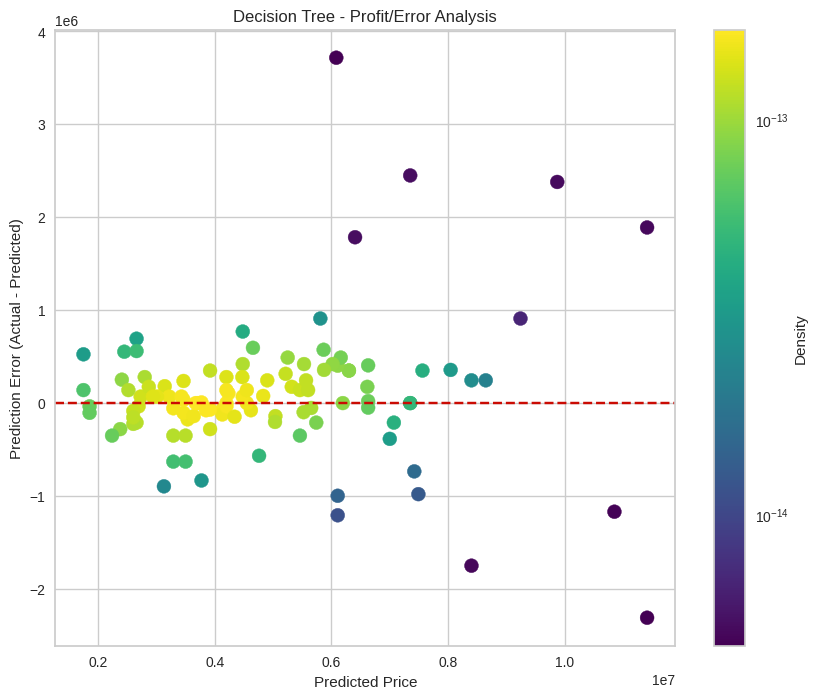

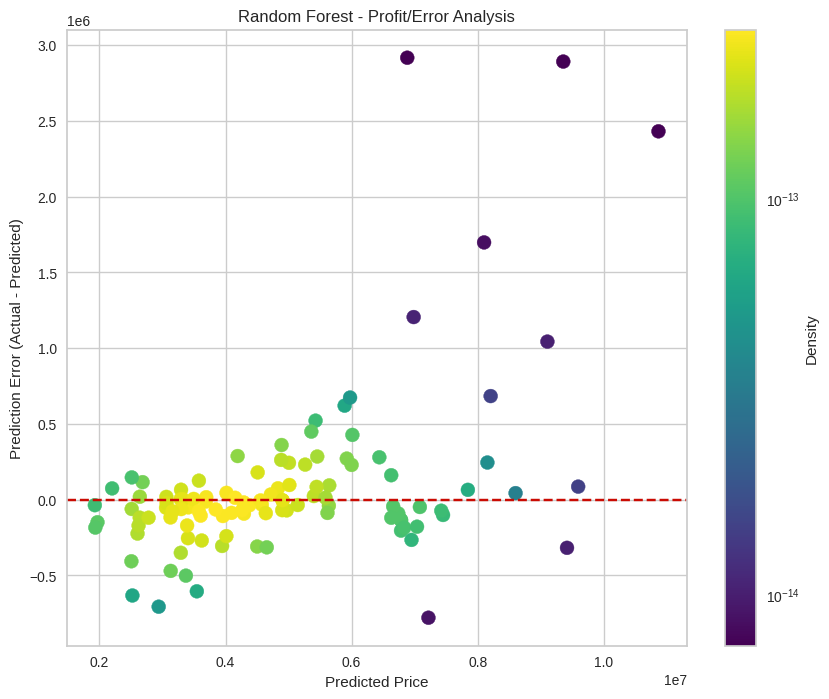

In [35]:
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm

def plot_profit_curve(y_true, y_pred, model_name):
    error = y_true - y_pred
    xy = np.vstack([y_pred, error])
    z = gaussian_kde(xy)(xy)

    plt.figure(figsize=(10, 8))
    plt.scatter(y_pred, error, c=z, s=100, cmap='viridis', norm=LogNorm())
    plt.colorbar(label='Density')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'{model_name} - Profit/Error Analysis')
    plt.xlabel('Predicted Price')
    plt.ylabel('Prediction Error (Actual - Predicted)')
    plt.grid(True)
    plt.show()

for name, preds in models.items():
    plot_profit_curve(y_test, preds, name)

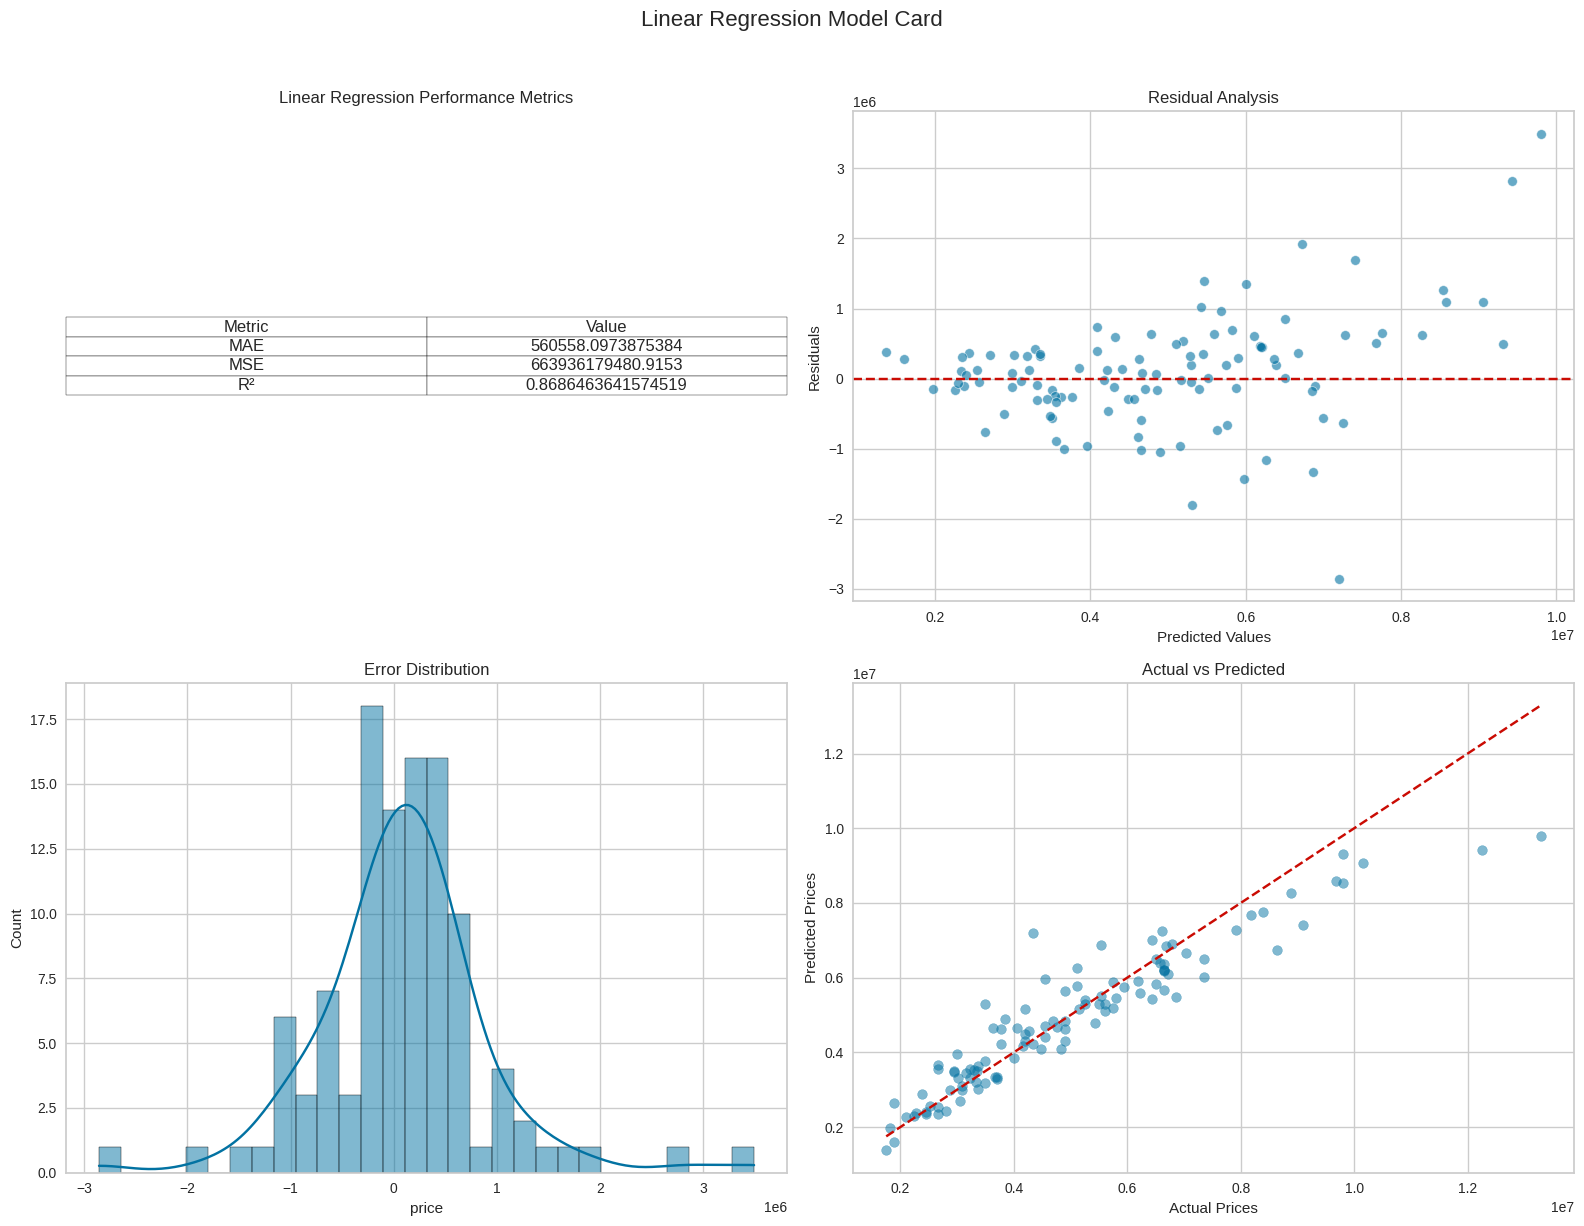

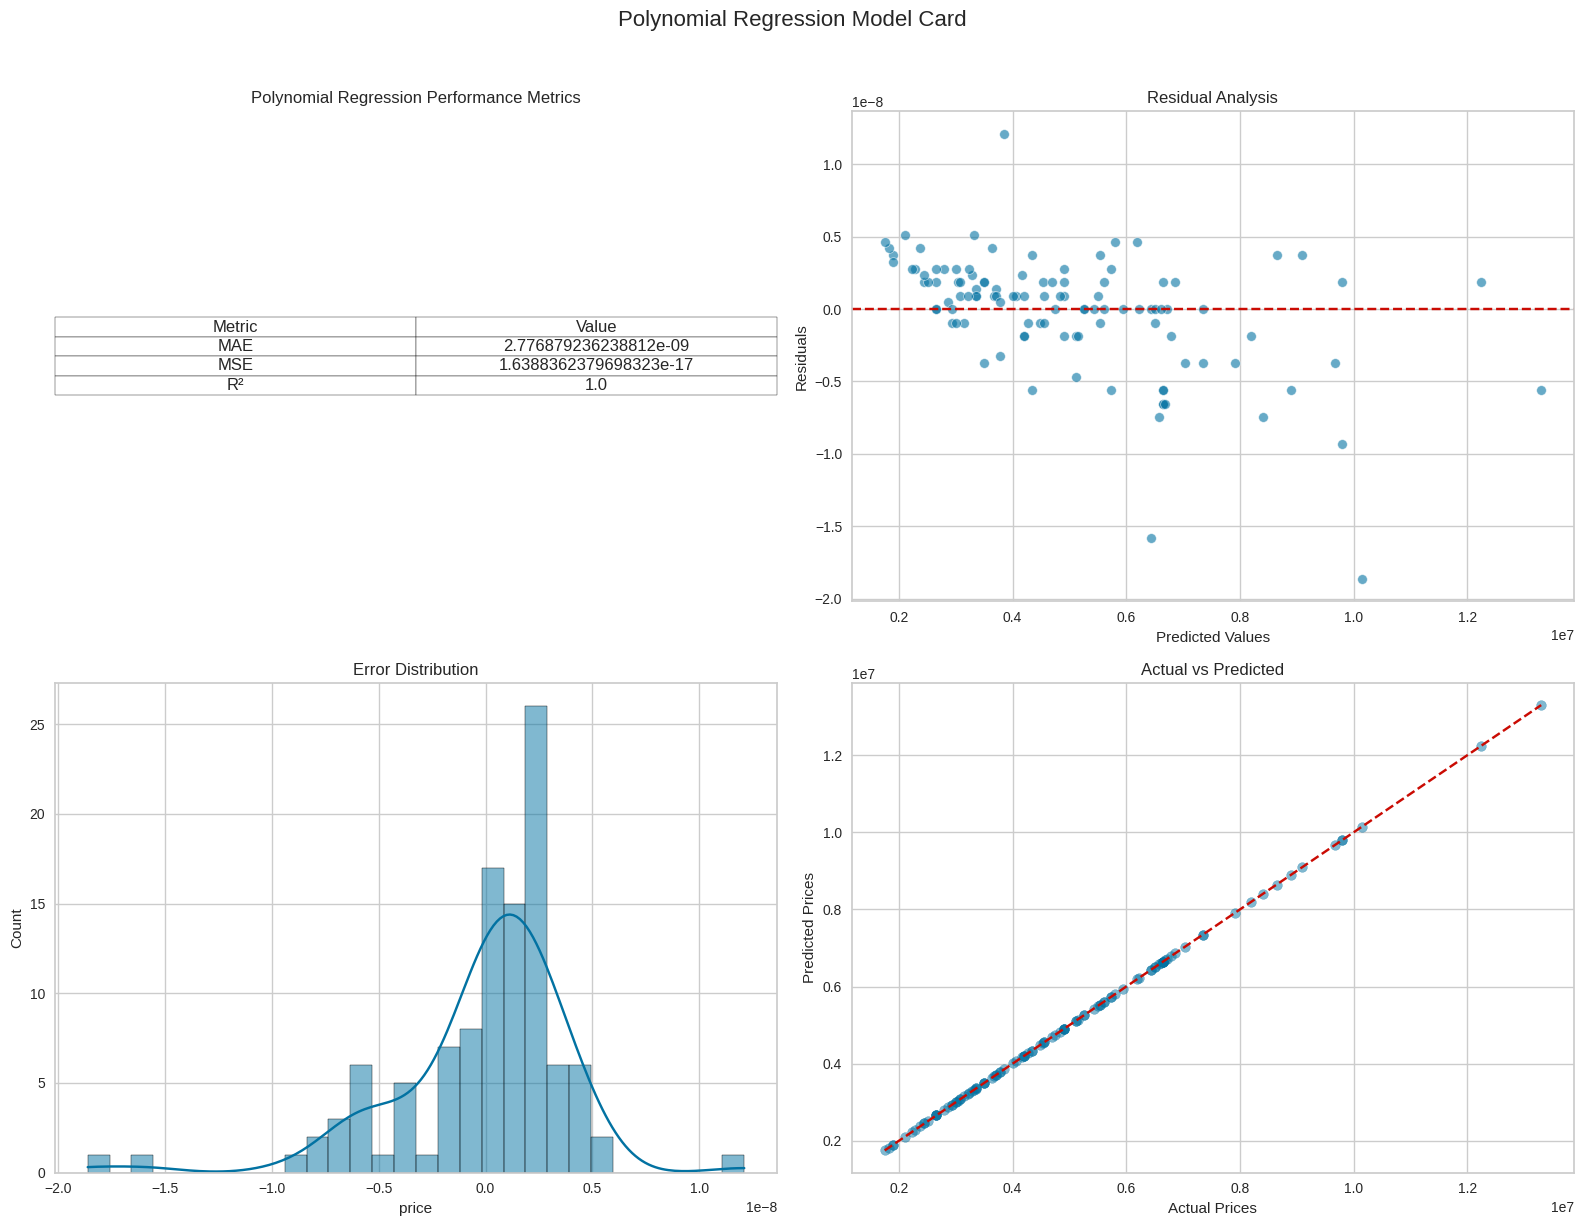

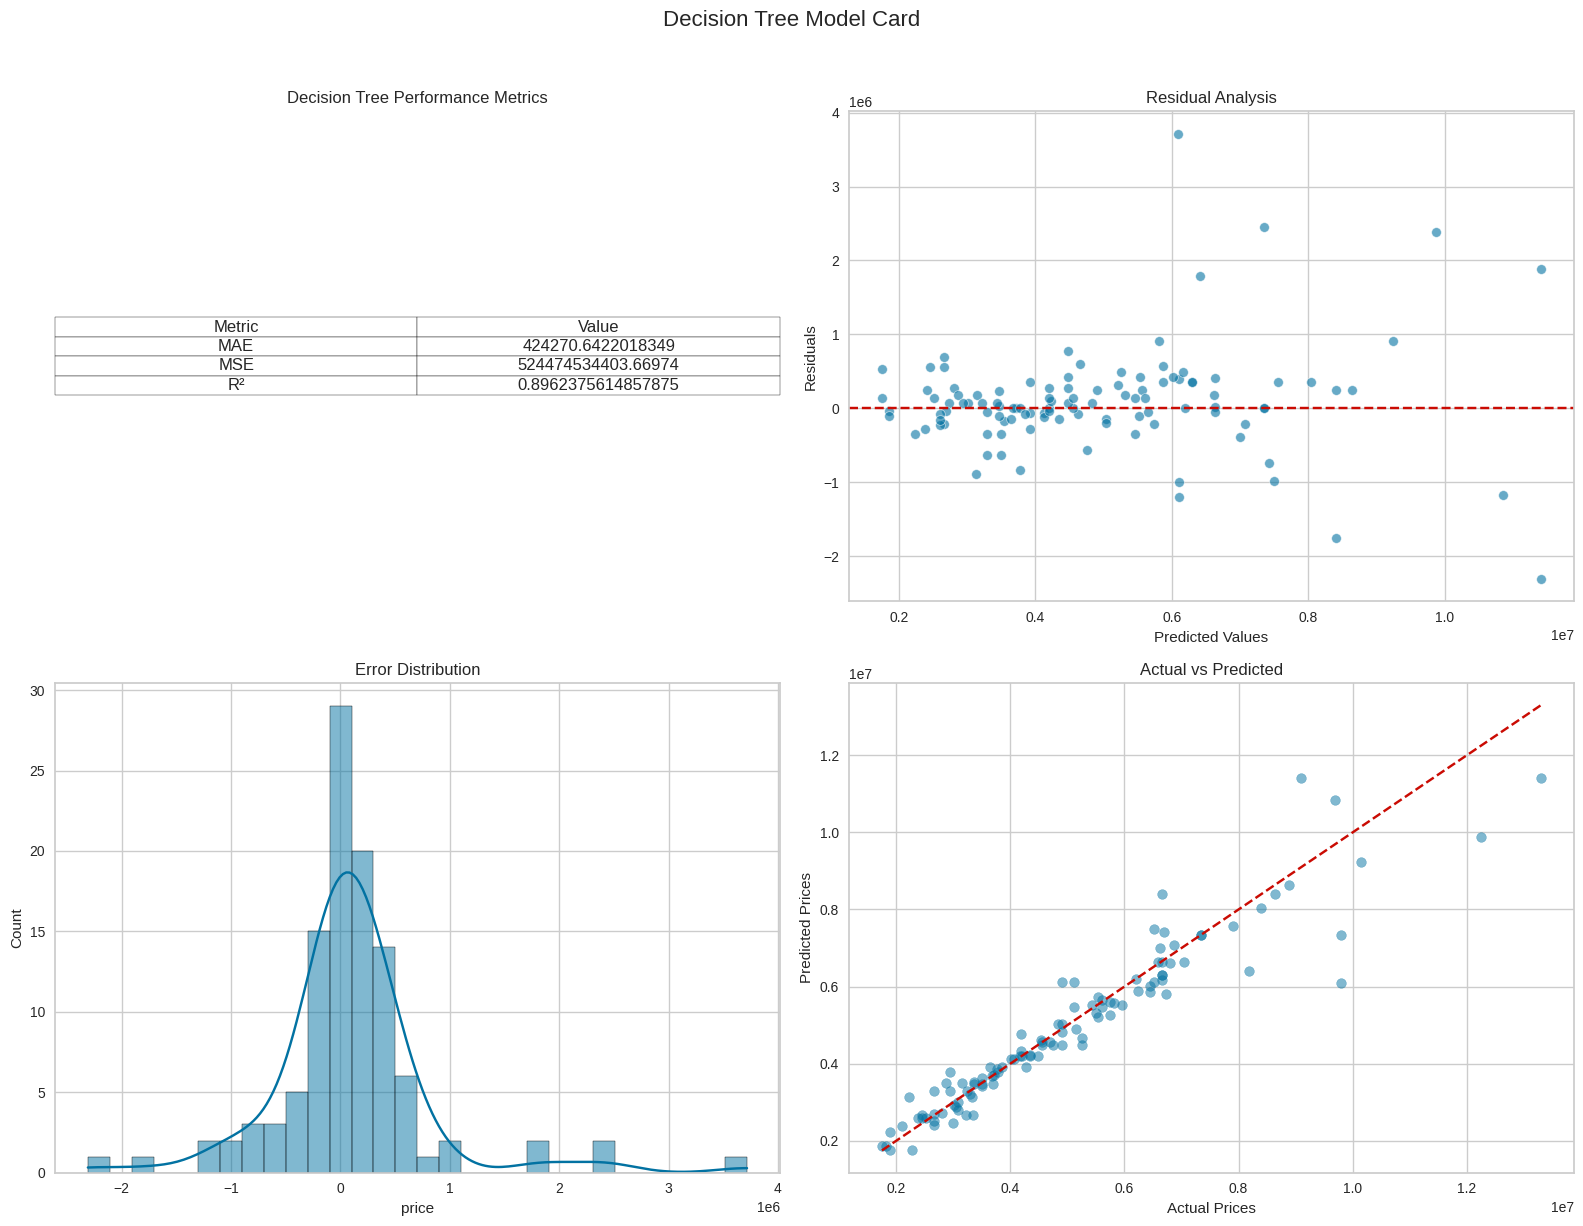

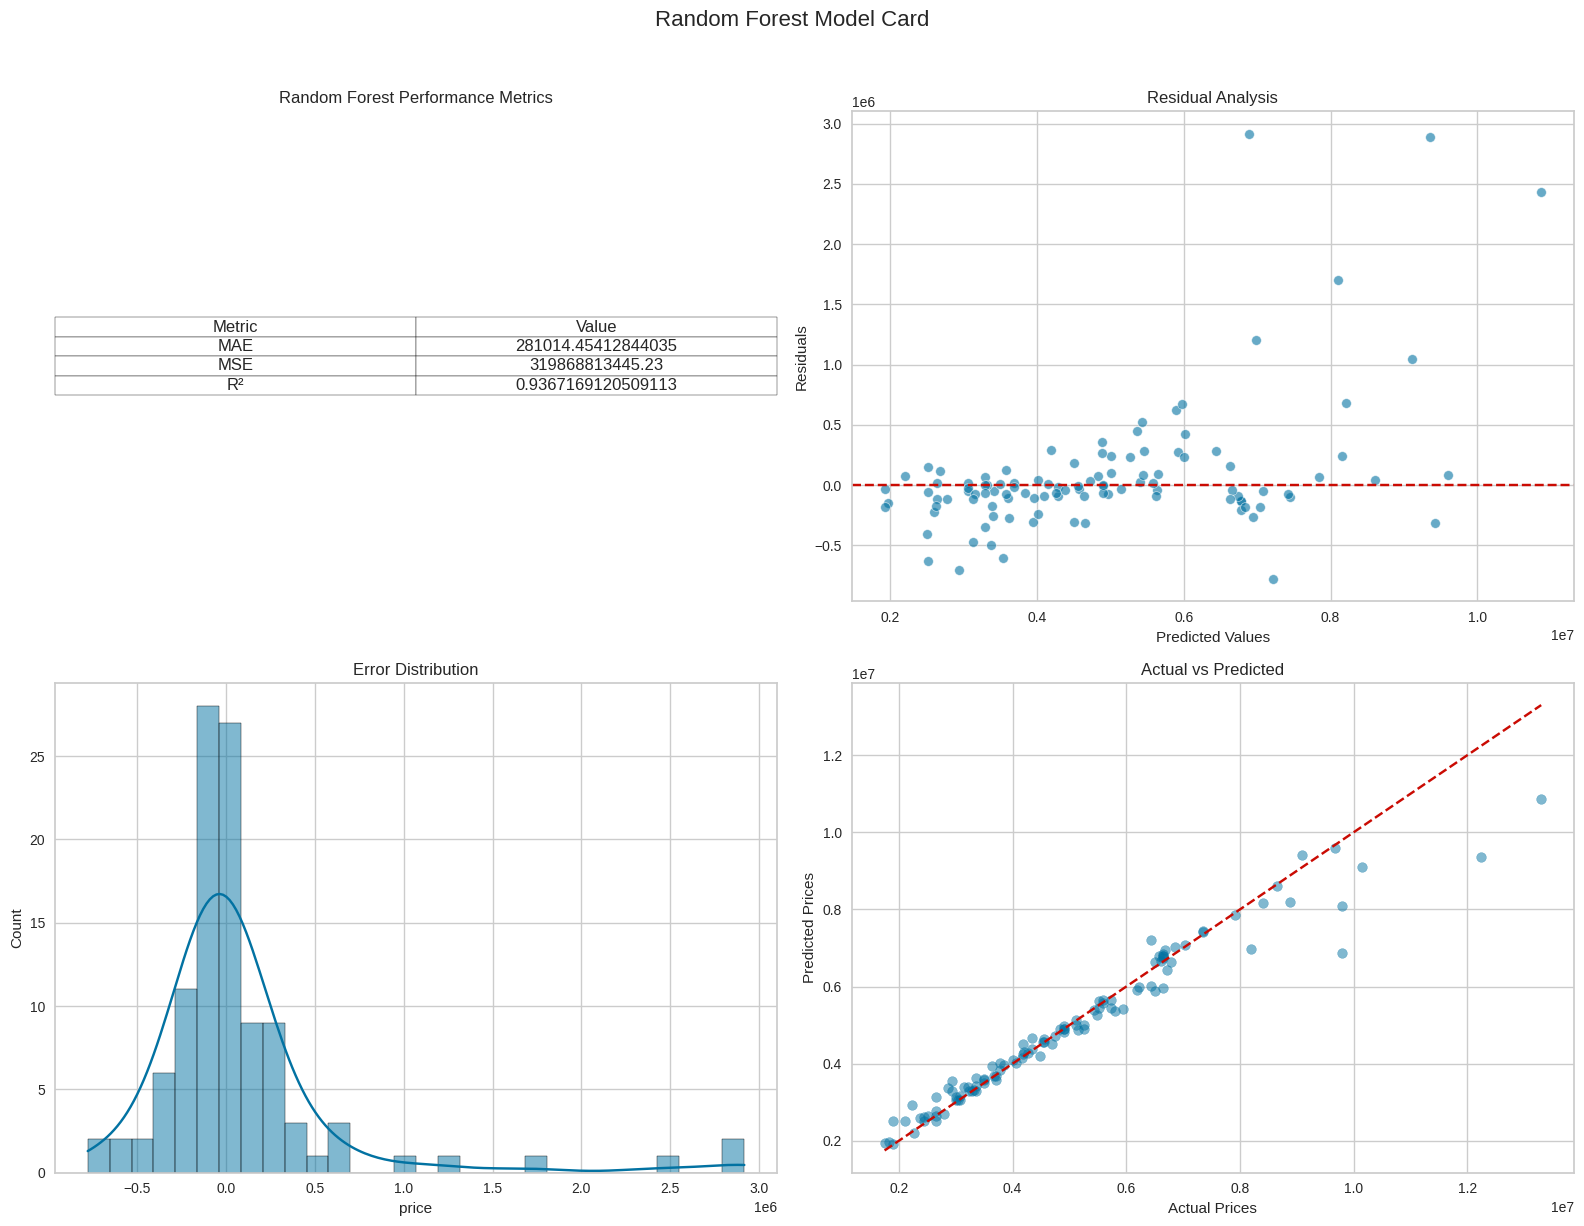

In [36]:
def generate_model_card(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    plt.figure(figsize=(16, 12))

    # Model Metrics
    plt.subplot(2, 2, 1)
    metrics = pd.DataFrame({
        'Metric': ['MAE', 'MSE', 'R²'],
        'Value': [
            mean_absolute_error(y_test, y_pred),
            mean_squared_error(y_test, y_pred),
            r2_score(y_test, y_pred)
        ]
    })
    plt.table(cellText=metrics.values,
             colLabels=metrics.columns,
             loc='center',
             cellLoc='center')
    plt.axis('off')
    plt.title(f'{model_name} Performance Metrics')

    # Residual Plot
    plt.subplot(2, 2, 2)
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residual Analysis')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

    # Error Distribution
    plt.subplot(2, 2, 3)
    sns.histplot(residuals, kde=True, bins=30)
    plt.title('Error Distribution')

    # Actual vs Predicted
    plt.subplot(2, 2, 4)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()], 'r--')
    plt.title('Actual vs Predicted')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')

    plt.suptitle(f'{model_name} Model Card', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

# Generate model cards for all models
for name, model in [
    ('Linear Regression', lr_pipe),
    ('Polynomial Regression', poly_pipe),
    ('Decision Tree', tree_pipe),
    ('Random Forest', forest_pipe)
]:
    generate_model_card(model, X_test, y_test, name)

In [37]:
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor

# First-level models
ridge = Ridge(alpha=1.0)
svr = SVR(kernel='rbf', C=100, gamma=0.1)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1)

# Meta-model
meta_model = RandomForestRegressor(n_estimators=50)

In [38]:
# Create stacking regressor
stacking_regressor = StackingRegressor(
    estimators=[
        ('ridge', ridge),
        ('svr', svr),
        ('xgb', xgb)
    ],
    final_estimator=meta_model,
    cv=5,
    passthrough=True  # Uses original features along with predictions
)

# Full pipeline with preprocessing
hybrid_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', stacking_regressor)
])

# Train the hybrid model
hybrid_pipe.fit(X_train, y_train)

# Evaluate
y_pred_hybrid = hybrid_pipe.predict(X_test)

In [39]:
print("\nHybrid Model Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_hybrid):,.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_hybrid):,.2f}")
print(f"R²: {r2_score(y_test, y_pred_hybrid):.4f}")

# Add to comparison
results.loc[len(results)] = ['Hybrid Stacking',
                           mean_absolute_error(y_test, y_pred_hybrid),
                           mean_squared_error(y_test, y_pred_hybrid),
                           r2_score(y_test, y_pred_hybrid)]

print("\nUpdated Model Comparison:")
print(results.sort_values('R²', ascending=False))


Hybrid Model Performance:
MAE: 242,879.35
MSE: 156,766,242,608.77
R²: 0.9690

Updated Model Comparison:
                   Model           MAE           MSE        R²
1  Polynomial Regression  2.776879e-09  1.638836e-17  1.000000
4        Hybrid Stacking  2.428793e+05  1.567662e+11  0.968985
3          Random Forest  2.810145e+05  3.198688e+11  0.936717
2          Decision Tree  4.242706e+05  5.244745e+11  0.896238
0      Linear Regression  5.605581e+05  6.639362e+11  0.868646


In [40]:
# 1. Base Model Contributions
base_preds = {name: model.predict(X_test)
             for name, model in stacking_regressor.named_estimators_.items()}

plt.figure(figsize=(12, 6))
for i, (name, preds) in enumerate(base_preds.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(y_test, preds, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()], 'r--')
    plt.title(f'{name} Base Predictions')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
plt.tight_layout()
plt.show()

# 2. Stacked vs Base Performance
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R²', data=results.sort_values('R²'))
plt.title('Model Comparison: R² Scores')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


ValueError: X has 16 features, but Ridge is expecting 8 features as input.

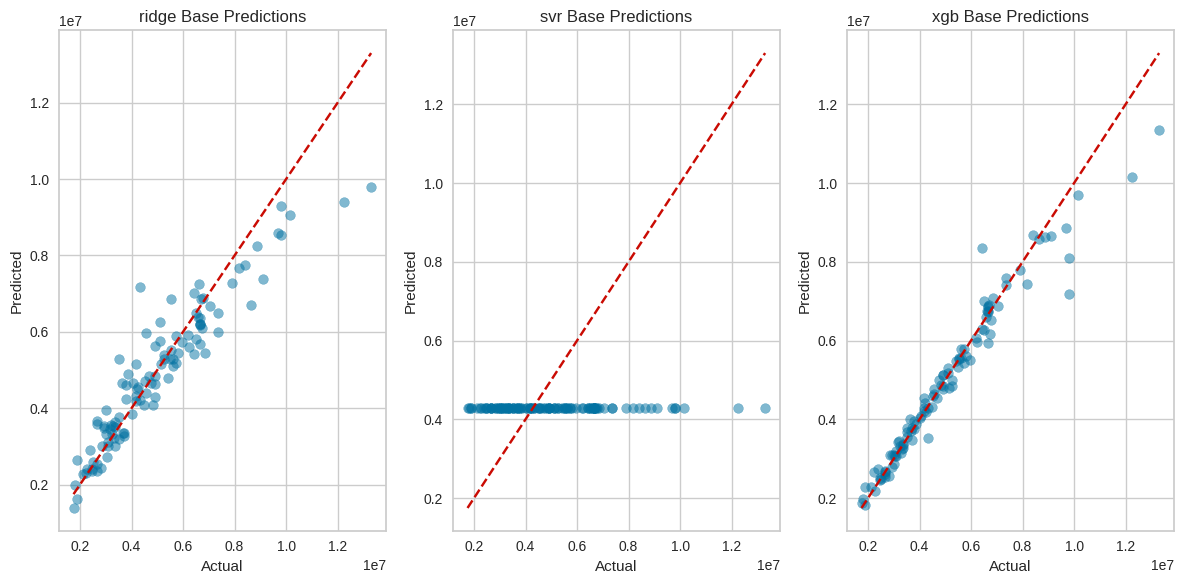

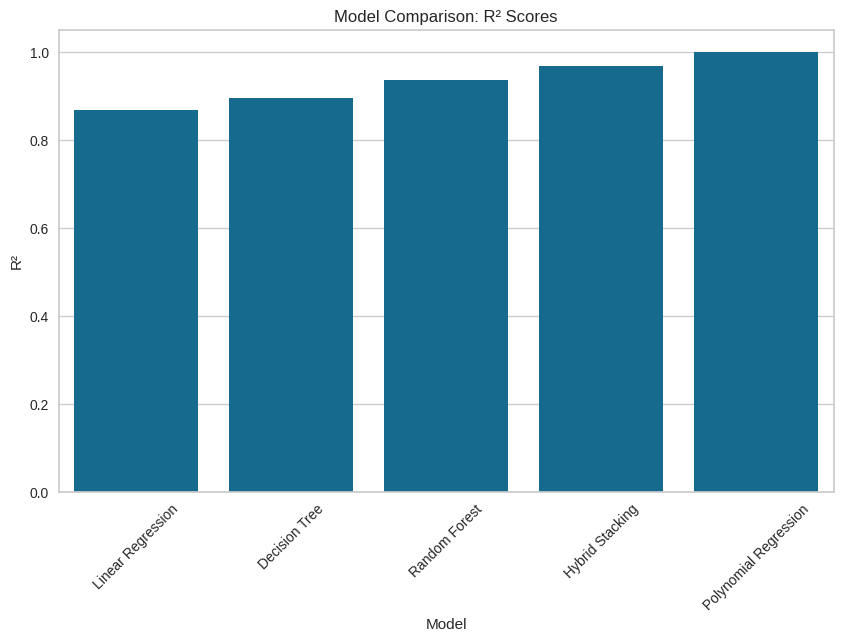

In [42]:
# 1. Base Model Contributions
base_preds = {name: model.predict(forest_pipe.named_steps['preprocessor'].transform(X_test))  # Preprocess X_test for base models
             for name, model in stacking_regressor.named_estimators_.items()}

plt.figure(figsize=(12, 6))
for i, (name, preds) in enumerate(base_preds.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(y_test, preds, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()], 'r--')
    plt.title(f'{name} Base Predictions')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
plt.tight_layout()
plt.show()

# 2. Stacked vs Base Performance
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R²', data=results.sort_values('R²'))
plt.title('Model Comparison: R² Scores')
plt.xticks(rotation=45)
plt.show()

In [44]:
# Get feature importance from meta-model
final_model = hybrid_pipe.named_steps['regressor'].final_estimator_
importances = final_model.feature_importances_

# Get feature names (original + base model predictions)
# Updated to align with the number of features used in the final model
feature_names = list(stacking_regressor.named_estimators_.keys()) + ['passthrough']

# Create importance dataframe
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title('Hybrid Model Feature Importance (Top 15)')
plt.show()

ValueError: All arrays must be of the same length

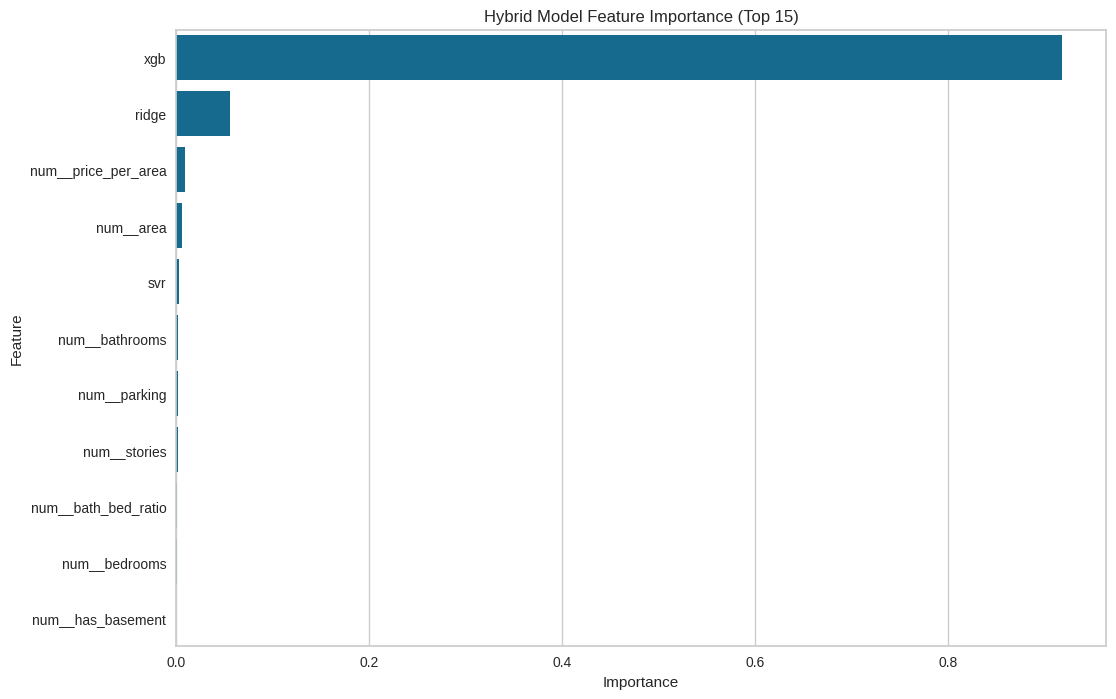

In [46]:
# Get feature importance from meta-model
final_model = hybrid_pipe.named_steps['regressor'].final_estimator_
importances = final_model.feature_importances_

# Get feature names (original + base model predictions)
# Get the transformed data for the test set
transformed_data = hybrid_pipe.named_steps['preprocessor'].transform(X_test)
# Get the feature names after transformation
feature_names = hybrid_pipe.named_steps['preprocessor'].get_feature_names_out(input_features=X_train.columns)

#Adjust feature names to account for base estimators and passthrough
# This part assumes your final_estimator sees all base model predictions + original features
feature_names = list(stacking_regressor.named_estimators_.keys()) + list(feature_names)


# Create importance dataframe
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title('Hybrid Model Feature Importance (Top 15)')
plt.show()

In [45]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'regressor__ridge__alpha': [0.1, 1.0, 10.0],
    'regressor__svr__C': [0.1, 1, 10, 100],
    'regressor__xgb__n_estimators': [50, 100, 200],
    'regressor__final_estimator__n_estimators': [30, 50, 100]
}

search = RandomizedSearchCV(
    hybrid_pipe,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42
)

search.fit(X_train, y_train)

print("Best Parameters:", search.best_params_)
print("Best MSE:", -search.best_score_)

Best Parameters: {'regressor__xgb__n_estimators': 100, 'regressor__svr__C': 1, 'regressor__ridge__alpha': 0.1, 'regressor__final_estimator__n_estimators': 30}
Best MSE: 141660279557.92618


In [47]:
import joblib
import json

# Save the model
joblib.dump(search.best_estimator_, 'hybrid_housing_model.pkl')

# Save feature names
with open('feature_names.json', 'w') as f:
    json.dump(list(X_train.columns), f)

# Example prediction function
def predict_house_price(model_path, input_data):
    model = joblib.load(model_path)
    return model.predict(input_data)